## First . Neurons

TF Graphs

In [1]:
import numpy as np
import tensorflow as tf

** Set Random Seeds for same results **

In [2]:
np.random.seed(101)

In [3]:
tf.set_random_seed(101)

** Data Setup **

Setting up some Random Data for demostration purpose

In [4]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [5]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [6]:
# CONFIRM SAME  RANDOM NUMBERS (EXECUTE SEED IN SAME CELL!)
np.random.seed(101)
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

### Placeholders

In [8]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

### Operations

In [9]:
add_op = a + b
mul_op = a * b

### Running Sessions to create Graphs with Feed Dictionaries

In [12]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict = {a:rand_a, b:rand_b})
    print(add_result)
    
    print()
    mul_result = sess.run(mul_op, feed_dict = {a:rand_a, b:rand_b})
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]

[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Example Neural Network

In [13]:
n_features = 10
n_dense_neurons = 3

In [14]:
# placehodel for x
x = tf.placeholder(tf.float32, (None, n_features))

In [15]:
# vairable for w and b

In [16]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

Instructions for updating:
Colocations handled automatically by placer.


** Operation Activation Function **

In [17]:
xW = tf.matmul(x, W)

In [18]:
z = tf.add(xW, b)

** Activationfunction **

In [19]:
# tf.nn.relu() or tf.tanh()
a = tf.nn.sigmoid(z)

** Variable Intializer! **

In [20]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    output_layer = sess.run(a, feed_dict = {x:np.random.random([1, n_features])})

In [23]:
print(output_layer)

[[0.19592889 0.8423014  0.36188066]]


### Simple Regression Example
Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

In [24]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [25]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [27]:
y_lable = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [28]:
y_lable

array([-0.17289561,  2.24387308,  3.57001461,  3.26783558,  4.32780247,
        5.96742265,  6.14049066,  6.63051206,  7.54219188, 10.41297596])

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

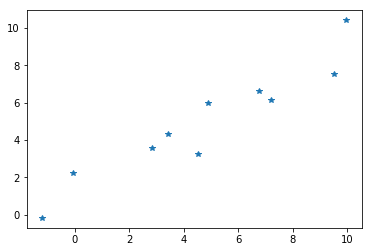

In [30]:
plt.plot(x_data, y_lable, "*")

y = mx + b

** Variables **

In [31]:
np.random.rand(2)

array([0.81226589, 0.67026042])

In [32]:
m = tf.Variable(0.81)
b = tf.Variable(0.67)

### Cost Function

In [33]:
error = 0
for x, y in zip(x_data, y_lable):
    #Our predicted value
    y_hat = m * x + b
    
    # The cost we want to minimize (we'll need to use an optimization function for the minimization!)
    error += (y - y_hat)**2

### Optimizer

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [35]:
init = tf.global_variables_initializer()

### Create Session

In [49]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 100
    for i in range(epochs):
        sess.run(train)
        
    # Feth back the Result
    final_slop, final_intercept = sess.run([m, b])
        

In [50]:
final_slop

0.8092076

In [51]:
final_intercept

1.012321

### Evaluate Results

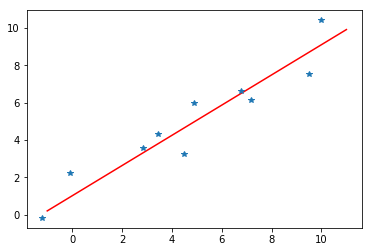

In [52]:
x_test = np.linspace(-1, 11, 10)

# predict y = mx + b
y_predict = final_slop * x_test + final_intercept

plt.plot(x_test, y_predict, "r")

plt.plot(x_data, y_lable, "*")